In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
iris = load_iris()

In [5]:
X,y = iris.data, iris.target

In [14]:
iris_df = pd.DataFrame(iris.data,columns=iris['feature_names'])

In [15]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

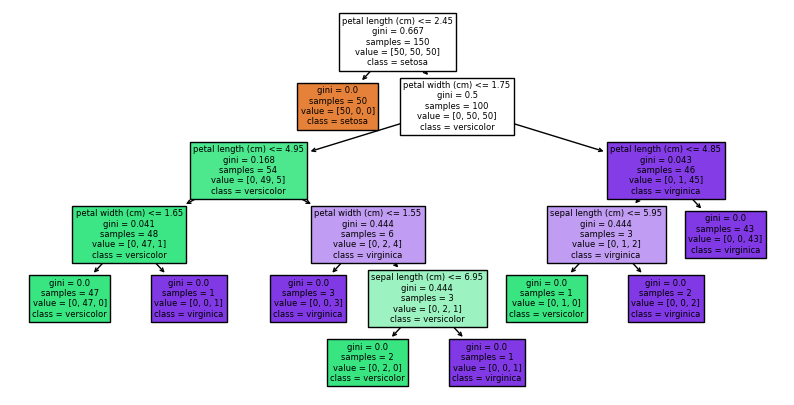

In [19]:
plt.figure(figsize=(10,5))
tree.plot_tree(clf,feature_names=iris['feature_names'],class_names=iris['target_names'],filled=True)
plt.show()

In [10]:
clf.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

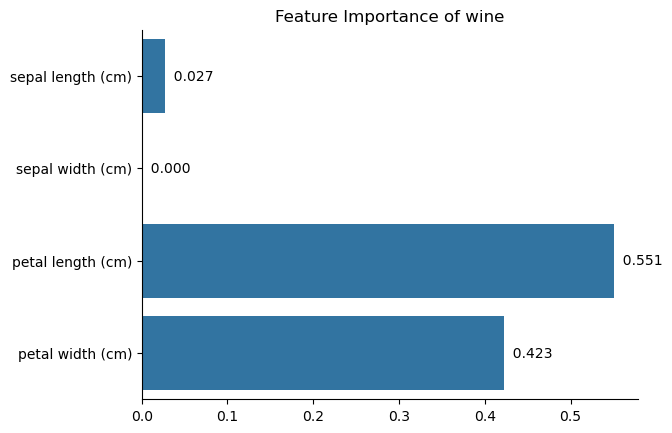

In [18]:
ax = sns.barplot(
    x=clf.feature_importances_,y=iris['feature_names'])

ax.bar_label(ax.containers[0],fmt='  %.3f')
plt.gca().spines[['right','top']].set_visible(False)
plt.title("Feature Importance of wine")
plt.show()

In [22]:
iris = load_iris()

In [ ]:
X = iris.data
y= iris.target

In [23]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=12,test_size=0.3)

In [24]:
rf = RandomForestClassifier(n_estimators=100,random_state=12)

In [25]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=12)

In [26]:
# 테스트 데이터를 사용하여 예측
y_pred = rf.predict(X_test)


In [28]:
acc = accuracy_score(y_test,y_pred)
acc

0.9777777777777777

In [30]:
print(classification_report(y_test,y_pred,target_names=iris['target_names']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.93      0.96        14
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [35]:
conf_matrix = confusion_matrix(y_test,y_pred)

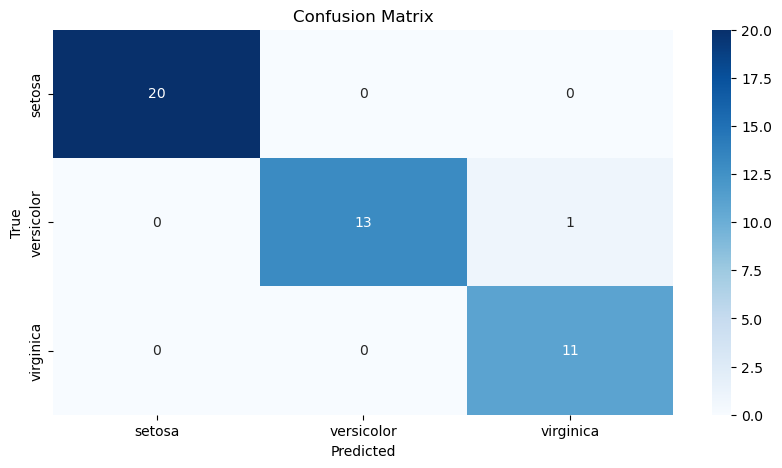

In [34]:
plt.figure(figsize=(10,5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap='Blues',
    xticklabels=iris['target_names'],
    yticklabels=iris['target_names'],
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()